# UNC Chapel Hill, Econ 590, Spring 2025
# Assignment 1
# Hunter Busick

## Exercise 1

### Exercise 1.1

Functions are essential for keeping our work both efficient and organized. Functions allow us to define a set of inputs, operations those inputs will undergo, and what we will get back out from the function. We can think of functions as machines that we put our variables into that manipulate or analyze them and give us an altered version of the input, or something entirely new. Functions are especially helpful because they allow us to quickly perform the same action time and time again without typing out the entire formula multiple times. For instance, if we needed to add, multiply, subtract, then divide a number in that order, we could define a function that does this process once, then every following time just call the function to save us time. An added perk of functions is that if we find an error, we can just fix the function definition rather than having to fix each individual time we called that function.

### Exercise 1.2

In [71]:
def get_fibonacci_sequence(n):
    """
    Takes n as an input and returns the n first integers of the fibonacci sequence 
    note that the sequence begins with an initialized list of two 1's

    Inputs: n -> number of integers you want in the sequence 
    Returns: fibbonacci -> a list containing n integers of the sequence 
    """
    if n <= 0 : #if the user requests an incompatible number of integers
        return [] #give them back an empty list 
    
    fibonacci = [1,1] #initialize the first two numbers of the sequence 

    while len(fibonacci) < n: #so long as we need more numbers to reach n
        num_to_add = fibonacci[-1] + fibonacci[-2] #the next number in the sequence can be accessed by adding the values found at the last two indicies 
        fibonacci.append(num_to_add) #add this next number to the end of of the sequence 

    return fibonacci # return the entire sequence 

get_fibonacci_sequence(8) #should return 1,1,2,3,5,8,13,21

[1, 1, 2, 3, 5, 8, 13, 21]

As we can see this returns the first 8 digits of the fibonacci sequence 

### Exercise 1.3

When we run this code, the first element in list1 will also be changed to the value 42. This is because when we define newlist as being equal to list1, we are essentially making newlist a reference to the list found at list1. If we want newlist to be its own item in memory, there are a couple of different ways we can make sure it operates independently of list1. Instead of saying newlist = list1, we could just define newlist as the same set of numbers as we initially used when forming list1. This would create a new object in our memory. We could also call it a list when we define it by using newlist = list(list1). This will also create a separate item in memory that operates separate from the other.

## Exercise 2

Using modules is a good programming practice as it not only allows you to keep your work clean and organized, but also aides in others being able to access and run your code. When we have a module with functions inside of it we are able to import this module into whatever file or script we are working in and can then access those functions from the module in that script. Thus, if we have a function or series of functions that we know we are going to use in multiple different places, we can put them in a module and then just import the module in each of those locations rather than risk copying and pasting for each instance. This also goes back to the function argument, that if we are importing modules and find a bug with a function, we only need to fix the module rather than if we had typed everything out each time.

## Exercise 3 (3.1 - 3.6)

In [72]:
class Consumer:
    """
    A class to represent a consumer that has cash, can study, can eat and work, and has an energy level 
    """
    def __init__(self, name, energy = 100, cash = 0, hunger = 0, skill = 0):
        self.name = name
        self.energy = energy
        self.__cash = cash
        self.hunger = hunger
        self.skill = skill

    def __str__(self):
        """
        returns the name of the consumer 
        """
        return self.name #Dunder method, calling print(Consumer) will give back the name 

    def get_cash(self):
        """
        returns the current amount of cash for the consumer
        """
        return self.__cash #private cash attribute 
    
    def study(self):
        """
        increases the consumers skill if they have energy
        reduces energy and hunger levels 
        """
        if self.energy < 10: #in the event that we do not have enogh enery for studying, 
            print("No energy for studying!") #do not allow them to study
        else: #otherwise 
            print("Studying...") #Print to confirm studying occurring 
            if self.skill >= 96: #in this case we do not want to go above 100
                self.skill = 100 #manually set to 100 so we do not go over 100
            else: #this else case activates for 95 and below 
                self.skill += 5 #5 skill points for each stusy session 
            self.energy -= 10 #takes 10 energies to study 
            self.hunger -= 5 #per assignment instructions 

    def eat(self):
        """
        decreases hunger if the consumer can afford it 
        """
        if self.__cash < 20: #can only eat if we have enough cash to do so 
            print("Not enough cash to buy food.")
        else: #othherwise 
            print("Eating!") #confirmation that the consumer is eating
            self.__cash -= 20 #takes 20 cash to eat 
            self.energy = 100 #eating gives full energy
            self.hunger = 0 #eating fully resets hunger 

    def work(self, h):
        """
        work for h hours, gain cash, reduce energy, increase hunger 
        """
        if h <= 0: #work amount must be nonnegative 
            print("Invalid work hours.")
            return #return to exit 
        # if work hours nonnegative:
        energy_cost = h + h**2 #energy cost calculation
        hunger_increase = .4 * h  #hunger increase calculation

        if self.energy < energy_cost: #if we dont have enough energy after calculation
            print("Not enough energy to work.")
            return #return to exit 
        #otherwise 
        earnings = h * self.skill #earnings is a calculation of skill and hours worked 
        self.__cash += earnings #we add earnings to our cash ammount 
        self.energy -= energy_cost #deplete our energy reserves 
        self.hunger += hunger_increase #this makes us hungry 
        print(f"Worked for {h} hours and earned {earnings} cash.") #use f string to display these actions


In [73]:
#Creating a consumer

hunter = Consumer("Hunter")
print(hunter)

hunter.study()
print(hunter.skill, hunter.energy, hunter.hunger)

hunter.work(3)
print(hunter.get_cash(), hunter.energy, hunter.hunger)

hunter.eat()

hunter.work(1)

hunter.eat()
print(hunter.get_cash(), hunter.energy, hunter.hunger, hunter.skill)



Hunter
Studying...
5 90 -5
Worked for 3 hours and earned 15 cash.
15 78 -3.8
Not enough cash to buy food.
Worked for 1 hours and earned 5 cash.
Eating!
0 100 0 5


## Exercise 4

### Exercise 4.1

Solving concave maximization problems is similar to finding the roots of nonlinear equations as the maximum of a concave function is the point where its derivative is equal to 0. That is the point where the slope of the tangent line is 0. It is then true that finding the maximal point of f(x) is simply solving the equation f'(x) which we know is finding the roots. 

### Exercise 4.2

The Bissection Method and the Newton-Raphson method are both numerical methods for finding roots of nonlinear equations but have some differences in their advantages and disadvantages. The Bissection method requires two initial points with different signs of a continuous function to ensure that there is a root between them. The algorithm then cuts the interval in half until convergence. This method is simple and effective, but is not the fastest. The Newton-Raphson method instead converges much quicker using an algorithm tha improves each guess quadratically. While more efficient, this method requires a decent initial guess and may struggle with poor estimations.

### Exercise 4.3

In [74]:
def bisect_newton_raphson(f, a , b, tol):
    """
    Combines Newton-Raphson and Bissection methods to find approximate root of function, f

    Inputs:
    f: function to find the root of 
    a, b: two initial points such that f(a) and f(b) have opposite signs ensuring a root
    tol: tolerance level at which the algorithm is suspended when we surpass it

    Returns:
    dict with "success" = True for roots found within tolerance, false otherwise 
    "sol" approximate root if found 
    """

    result = {"success": False, "sol": None} #initialize dictionary for results 

    if f(a) * f(b) >= 0: #ensure a and b have oppsite signs 
        print("Error: f(a) and f(b) must have opposite signs.")
        return result #if this is the case retuern the dict initialized with false 
    
    #Bisection 

    while abs(b - a) >= .05: #use the bisection method so long as interval between 
        # a and b is greater than .05 
        mid = (a + b) / 2.0 #midpoint calculation of current interval 

        if abs(f(mid)) < tol: #if our midpoint value is within the tolerance 
            return {"success": True, "sol": mid} #valid approximate root, assign as such
        
        #determine other potential interval for root
        if f(a) * f(mid) < 0: #if f(a) and f(mid) have opp sign then root inbetween the two
            b = mid
        else: #otherwise root must be between mid and b
            a = mid

    #this interval is then sufficiently small a,b 
    #switch to newton raphson for convergence 
    x = (a + b) / 2.0 #use midpoint of final interval for intial guess 
    max_iter = 100 #give a generous iter limit to avoid infinite occurences 
    h = 1e-6 #small h for numerical approximation

    for _ in range(max_iter): #as many times as it takes to converge within limit
        #approximate f'(x) using central difference 
        dfx = (f(x + h) - f(x - h)) / (2 * h)
        if dfx == 0: #this will nit work with 0
            return {"success": True, "sol": x} #assign this as the sol then 
        #otherwise compute next spproximation using NR update 
        xnew = x - f(x) / dfx 
        #check if update is small enough or close enough to zero
        if abs(xnew - x) < tol or abs(f(xnew)) < tol:
            return {"success": True, "sol": xnew} #if so we have converged 
        #otherwise update and recursively run until satisfied 
        x = xnew
    #for if the loop is exited without converging: false but with sol x
    return {"success": False, "sol": x}

### Exercise 4.4

In [75]:
### Comments for this chunk are only updated for moreinfo changes ###

def bisect_newton_raphson(f, a, b, tol, more_info = False):
    """
    Combines Newton-Raphson and Bissection methods to find approximate root of function, f

    Inputs:
    f: function to find the root of 
    a, b: two initial points such that f(a) and f(b) have opposite signs ensuring a root
    tol: tolerance level at which the algorithm is suspended when we surpass it
    more_info: boolean if true function returns list of approx solutions computed along the way 

    Returns:
    dict with "success" = True for roots found within tolerance, false otherwise 
    "sol" approximate root if found 
    iterates: if activated -> list of approximate solutions recorded during iterations 
    """

    result = {"success": False, "sol": None}
    # initialize a new list to store iterations if more info changed from false 
    iterates = [] if more_info else None
    

    if f(a) * f(b) >= 0:
        print("Error: f(a) and f(b) must have opposite signs.")
        if more_info: #if moreinfo is true we add this result to iterates
            result["iterates"] = iterates
        return result
    
    while abs(b - a) >= .05:
        mid = (a + b) / 2
        if more_info: #if moreinfo then append mid to the iterates 
            iterates.append(mid)

        #This section is slightly restructured due to the addition of iterates 
        if abs(f(mid)) < tol:
            result["success"] = True
            result["sol"] = mid
            if more_info: #if we have moreinfo then update iterates 
                result["iterates"] = iterates
            return result 
        
        if f(a) * f(mid) < 0:
            b = mid
        else:
            a = mid

    #switch to newton raphson 
    x = (a + b) / 2
    if more_info: #once again append to the list of the update
        iterates.append(x)

    max_iter = 100
    h = 1e-6

    for _ in range(max_iter):

        dfx = (f(x + h) - f(x - h)) / (2 * h)
        if dfx == 0:

            result["sol"] = x
            if more_info: #if we have moreinfo, add again 
                result["iterates"] = iterates
            return result 
        
        xnew = x - f(x) / dfx

        if more_info: #append iterates with this new value each time within the loop
            iterates.append(xnew)

        # Also restructured to work when we have moreinfo
        if abs(xnew - x) < tol or abs (f(xnew)) < tol:
            result["success"] = True
            result["sol"] = xnew
            if more_info: #add iterates 
                result["iterates"] = iterates
            return result
        x = xnew


    result["sol"] = x # hopefully accurate by this point in the code 
    if more_info: #final iterates update 
        result["iterates"] = iterates
    return result #return the full dict 

                

### Exercise 4.5

In [76]:
def f(x): #define our function 
    """A function to test our bisect newton raphson method"""
    return 100*(x**3 - x**2) + 5
#set tol level for convergence 
tol = 1e-5
#we know all roots lie within -1 and 1
#define our intervals 
#in a quick estimation we can see three roots in the following intervals respectively:
intervals = [(-1,0), (0,0.5), (.5,1)]
#intialize list for roots
roots = []
#indicator for moreinfo
more_tag = True
#loop over intervals 
for (a, b) in intervals:
    result = bisect_newton_raphson(f, a, b, tol, more_info = True)
    #check for approx root 
    if result["success"]:
        roots.append(result["sol"])
        #use f string to show what was found 
        print(f"Root found in interval [{a}, {b}]: {result['sol']}")
        #give moreinfo info
        if more_tag:
            print("Iteration sequence:")
            print(result["iterates"])
            #if we did not succeed in converging 
    else:
        print(f"Failed to converge in the interval [{a}, {b}].")

#after all calculations print approx root 
print("The approximate rooots are:")
for r in roots:
    print(r)


Root found in interval [-1, 0]: -0.20380158046193828
Iteration sequence:
[-0.5, -0.25, -0.125, -0.1875, -0.21875, -0.203125, -0.2038029709811152, -0.20380158046193828]
Root found in interval [0, 0.5]: 0.25992433429787554
Iteration sequence:
[0.25, 0.375, 0.3125, 0.28125, 0.265625, 0.25994556913659256, 0.25992433429787554]
Root found in interval [0.5, 1]: 0.943877333482371
Iteration sequence:
[0.75, 0.875, 0.9375, 0.96875, 0.953125, 0.9440704172871678, 0.943877333482371]
The approximate rooots are:
-0.20380158046193828
0.25992433429787554
0.943877333482371


## Exercise 5

### Exercise 5.1

Numerical derivatives are approximations of the derivative of a function f(x). In this we use finite differences instead of using analytical expressions for f'(x). The finite difference method is based on the definition of a derivative: as the limit as h approaches 0. However we cannot take h -> 0 exactly so we use a small finite value of h to approximate derivatives. We then have forward, backward, and central difference methods that approximate (x+h), (x-h), and both respectively. Thus, finite difference methods directly relate to the definition of a derviative as instead of h -> 0, we use a finitely small h to compute the slope of a function over an interval. A smaller h will then lead to a closer approximation of the true derivative.

### Exercise 5.2

#### Exercise 5.2 (a)

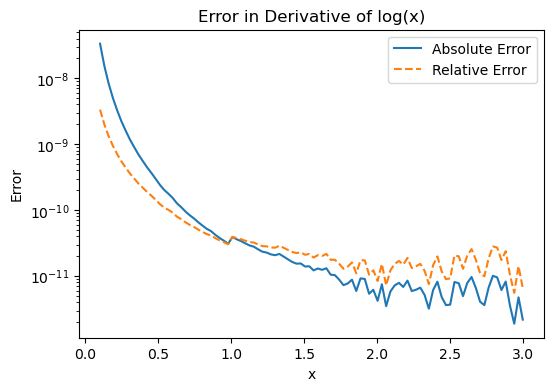

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# define function
f = lambda x: np.log(x)
#analytical derivative 
df_analytical = lambda x: 1 / x
# dedfine our interval and step size 
x_vals = np.linspace(0.1, 3.0, 100)
h = 1e-5  
# compute numerical derivative using central difference 
df_numerical_vals = (f(x_vals + h) - f(x_vals - h)) / (2 * h)
df_analytical_vals = df_analytical(x_vals)
# compute absolute
absolute_error = np.abs(df_numerical_vals - df_analytical_vals)
#compute relative
relative_error = np.abs(absolute_error / df_analytical_vals)


# Plottting using plotly 
plt.figure(figsize=(6, 4))
plt.plot(x_vals, absolute_error, label="Absolute Error")
plt.plot(x_vals, relative_error, label="Relative Error", linestyle='dashed')
plt.title("Error in Derivative of log(x)")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.yscale("log") #for better visualization
plt.show()


#### Exercise 5.2 (b)

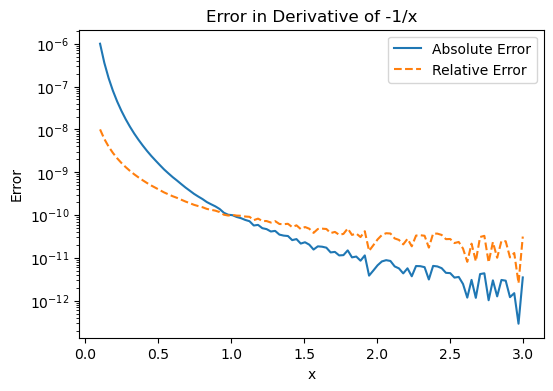

In [78]:
#Process same as (a) only change is function definition and analytical derivative 

import numpy as np
import matplotlib.pyplot as plt

# define function
f = lambda x: -1 / x
#analytical derivative 
df_analytical = lambda x: 1 / (x ** 2)
 
x_vals = np.linspace(0.1, 3.0, 100)

h = 1e-5  

df_numerical_vals = (f(x_vals + h) - f(x_vals - h)) / (2 * h)

df_analytical_vals = df_analytical(x_vals)

absolute_error = np.abs(df_numerical_vals - df_analytical_vals)

relative_error = np.abs(absolute_error / df_analytical_vals)



plt.figure(figsize=(6, 4))
plt.plot(x_vals, absolute_error, label="Absolute Error")
plt.plot(x_vals, relative_error, label="Relative Error", linestyle='dashed')
plt.title("Error in Derivative of -1/x")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.yscale("log") 
plt.show()


#### Exercise 5.2 (c)

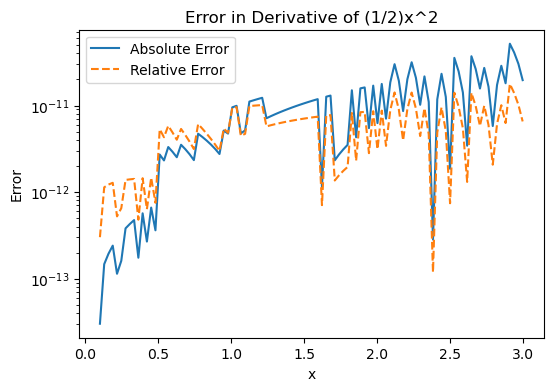

In [79]:
#Process same as (a) only change is function definition and analytical derivative 

import numpy as np
import matplotlib.pyplot as plt

# define function
f = lambda x: 0.5 * x ** 2
#analytical derivative 
df_analytical = lambda x: x

x_vals = np.linspace(0.1, 3.0, 100)

h = 1e-5 

df_numerical_vals = (f(x_vals + h) - f(x_vals - h)) / (2 * h)

df_analytical_vals = df_analytical(x_vals)

absolute_error = np.abs(df_numerical_vals - df_analytical_vals)

relative_error = np.abs(absolute_error / df_analytical_vals)



plt.figure(figsize=(6, 4))
plt.plot(x_vals, absolute_error, label="Absolute Error")
plt.plot(x_vals, relative_error, label="Relative Error", linestyle='dashed')
plt.title("Error in Derivative of (1/2)x^2")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.yscale("log")
plt.show()


#### Exercise 5.2 (d)

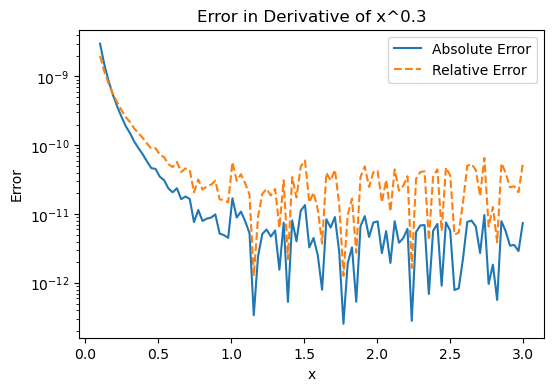

In [80]:
#Process same as (a) only change is function definition and analytical derivative 

import numpy as np
import matplotlib.pyplot as plt

# define function
f = lambda x: x ** 0.3
#analytical derivative 
df_analytical = lambda x: 0.3 * x ** -0.7

x_vals = np.linspace(0.1, 3.0, 100)

h = 1e-5  

df_numerical_vals = (f(x_vals + h) - f(x_vals - h)) / (2 * h)

df_analytical_vals = df_analytical(x_vals)

absolute_error = np.abs(df_numerical_vals - df_analytical_vals)

relative_error = np.abs(absolute_error / df_analytical_vals)

# Plot errors
plt.figure(figsize=(6, 4))
plt.plot(x_vals, absolute_error, label="Absolute Error")
plt.plot(x_vals, relative_error, label="Relative Error", linestyle='dashed')
plt.title("Error in Derivative of x^0.3")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.yscale("log")
plt.show()
